In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
K = 256

In [3]:
log_file = '/home/mcao610/scratch/TinyBERT_TEST/MNLI/teacher-cluster-{}/eval_results.txt'.format(K)

#### Draw Chart

In [4]:
eval_acc, train_acc = [], []

with open(log_file, 'r') as rf:
    for line in rf:
        line = line.strip()
        
        if 'train_acc' in line:
            train_acc.append(float(line.split()[-1]))
        elif 'acc' in line:
            eval_acc.append(float(line.split()[-1]))

In [5]:
assert len(eval_acc) == len(train_acc)

In [6]:
# y1 = x1  =>  x1 = y1
# y2 = x1 + x2 / 2  =>  x2 = y2 * 2 - x1
# y3 = x1 + x2 + x3 / 3  =>  x3 = y2 * 3 - x2 -x1

# for i in range(len(train_acc)):
#     print('{}: {}'.format(i, train_acc[i]))
smooth_accs = []

epoch_accs = []
for i, c in enumerate(train_acc[:31]):
    aacc = c * (i + 1) - sum(epoch_accs)
    epoch_accs.append(aacc)
smooth_accs.extend(epoch_accs)

epoch_accs = []
for i, c in enumerate(train_acc[31:63]):
    aacc = c * (i + 1) - sum(epoch_accs)
    epoch_accs.append(aacc)
smooth_accs.extend(epoch_accs)

epoch_accs = []
for i, c in enumerate(train_acc[63:]):
    aacc = c * (i + 1) - sum(epoch_accs)
    epoch_accs.append(aacc)
smooth_accs.extend(epoch_accs)

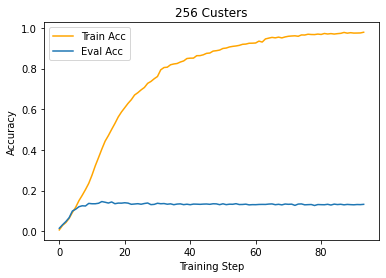

In [7]:
fig, ax = plt.subplots()

ax.plot([i for i in range(len(smooth_accs))], smooth_accs, '-', color='orange', label='Train Acc')
ax.plot([i for i in range(len(eval_acc))], eval_acc, '-', label='Eval Acc')

ax.set_title('{} Custers'.format(K))
ax.set_xlabel('Training Step')
ax.set_ylabel('Accuracy')

plt.savefig("figures/" + 'training_k{}'.format(K) +'.png', bbox_inches="tight")
plt.legend()
plt.show()